<a href="https://colab.research.google.com/github/JorgeJaramilo060892/Data-Analyst/blob/main/MS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import folium
import io
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:

# Leer el CSV
df = pd.read_csv("/content/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

# Mostrar los primeros registros para verificar que se haya cargado correctamente
print(df.head(5))



   Unnamed: 0  Gender  Age  Schooling  Breastfeeding  Varicella  \
0           0       1   34       20.0              1          1   
1           1       1   61       25.0              3          2   
2           2       1   22       20.0              3          1   
3           3       2   41       15.0              1          1   
4           4       2   34       20.0              2          1   

   Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  \
0              2.0                        1                  0       1   
1             10.0                        2                  1       1   
2              3.0                        1                  1       0   
3              7.0                        2                  1       0   
4              6.0                        2                  0       1   

   ULSSEP  VEP  BAEP  Periventricular_MRI  Cortical_MRI  Infratentorial_MRI  \
0       1    0     0                    0             1                  

In [17]:
df.describe(include="all")

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,136.000000,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,78.952517,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,68.000000,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,136.000000,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,204.000000,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,272.000000,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [13]:
df.shape


(273, 20)

In [15]:
df.dtypes

Unnamed: 0                   int64
Gender                       int64
Age                          int64
Schooling                  float64
Breastfeeding                int64
Varicella                    int64
Initial_Symptom            float64
Mono_or_Polysymptomatic      int64
Oligoclonal_Bands            int64
LLSSEP                       int64
ULSSEP                       int64
VEP                          int64
BAEP                         int64
Periventricular_MRI          int64
Cortical_MRI                 int64
Infratentorial_MRI           int64
Spinal_Cord_MRI              int64
Initial_EDSS               float64
Final_EDSS                 float64
group                        int64
dtype: object

In [16]:
df.isnull().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

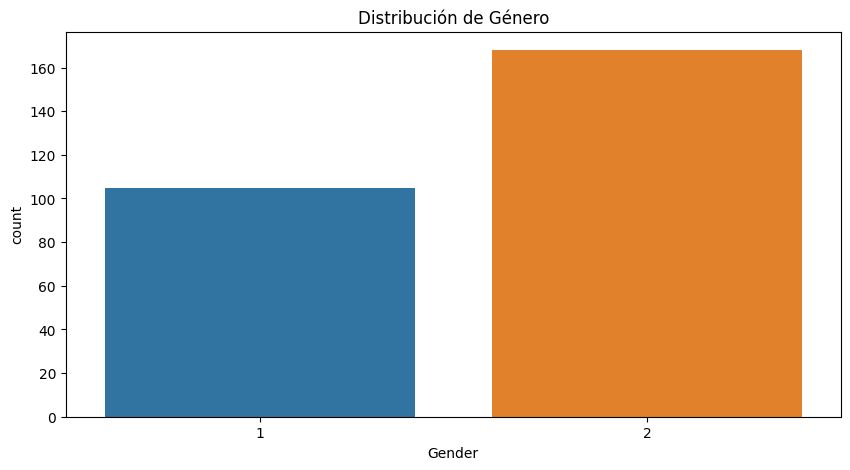

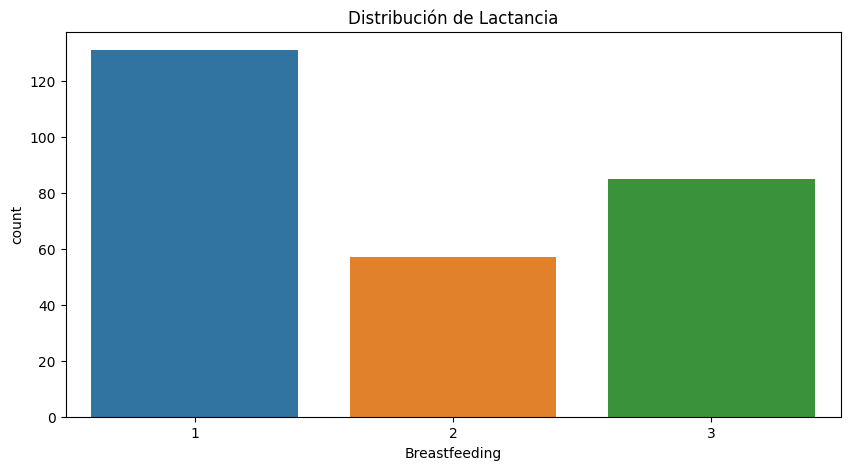

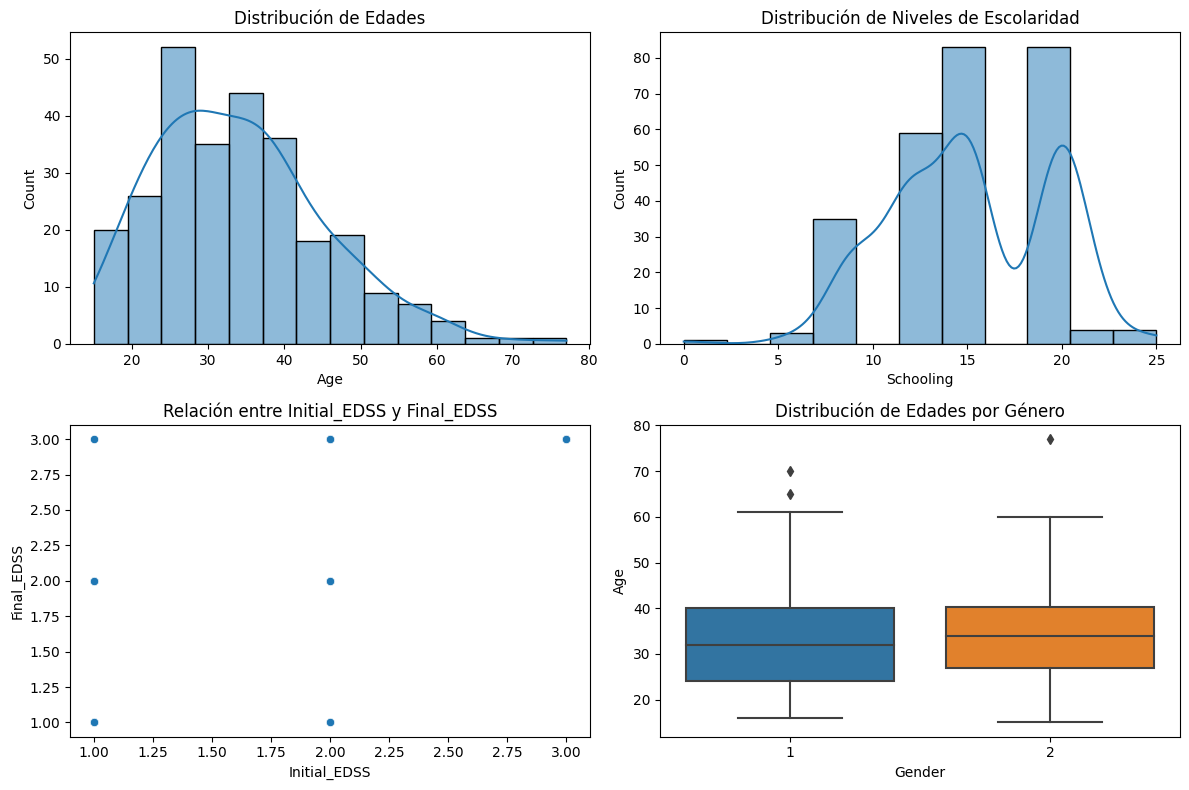

LinearRegression()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame
# df = pd.read_csv("tu_archivo.csv")

# Estadísticas Descriptivas
descriptivas_numericas = df[['Age', 'Schooling', 'Initial_EDSS', 'Final_EDSS']].describe()
descriptivas_categoricas = df[['Gender', 'Breastfeeding']].value_counts()

# Examinar la distribución de variables categóricas
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender')
plt.title('Distribución de Género')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Breastfeeding')
plt.title('Distribución de Lactancia')
plt.show()

# Visualizaciones
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edades')

plt.subplot(2, 2, 2)
sns.histplot(df['Schooling'], kde=True)
plt.title('Distribución de Niveles de Escolaridad')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Initial_EDSS', y='Final_EDSS', data=df)
plt.title('Relación entre Initial_EDSS y Final_EDSS')

plt.subplot(2, 2, 4)
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Distribución de Edades por Género')

plt.tight_layout()
plt.show()

# Correlaciones
correlaciones = df.corr()

# Modelado
# Para el modelado, necesitaríamos más información sobre qué quieres predecir y qué variables utilizar.
# Se podría emplear scikit-learn para modelos de regresión o clasificación.

# Ejemplo de regresión lineal simple
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Supongamos que df es tu DataFrame
# df = pd.read_csv("tu_archivo.csv")

# Eliminamos las filas con valores faltantes en Initial_EDSS y Final_EDSS
df_cleaned = df.dropna(subset=['Initial_EDSS', 'Final_EDSS'])

# Definimos nuestras variables independientes (X) y dependientes (y)
X = df_cleaned[['Initial_EDSS']]
y = df_cleaned['Final_EDSS']

# Tratamos los valores faltantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Creamos el modelo de regresión
modelo = LinearRegression()
modelo.fit(X, y)



In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Supongamos que df es tu DataFrame original
# df = pd.read_csv("tu_archivo.csv")

# Eliminamos las filas con valores faltantes en Initial_EDSS y Final_EDSS
df_cleaned = df.dropna(subset=['Initial_EDSS', 'Final_EDSS'])

# Definimos nuestras variables independientes (X) y dependientes (y)
X = df_cleaned[['Initial_EDSS']]
y = df_cleaned['Final_EDSS']

# Tratamos los valores faltantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1))  # Aseguramos que y sea un arreglo 2D

# Dividimos el conjunto de datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

# Hacemos predicciones en los datos de prueba
y_pred = modelo.predict(X_prueba)

# Evaluamos el modelo
r2 = r2_score(y_prueba, y_pred)
mse = mean_squared_error(y_prueba, y_pred)

print(f'R^2: {r2}')
print(f'MSE: {mse}')


R^2: 0.3731993666363851
MSE: 0.2567375394257367


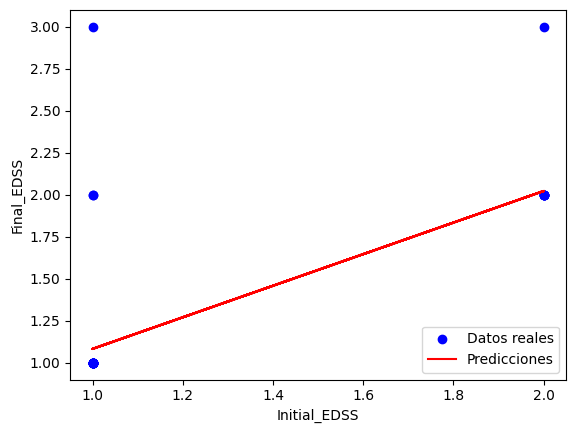

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X_prueba, y_prueba, color='blue', label='Datos reales')
plt.plot(X_prueba, y_pred, color='red', label='Predicciones')
plt.xlabel('Initial_EDSS')
plt.ylabel('Final_EDSS')
plt.legend()
plt.show()
